<a href="https://colab.research.google.com/github/andresgutierrezmt/proyectoSe-ales/blob/main/Andres_Camilo_Gutierrez_Gonzalez_Proyecto_final_Se%C3%B1ales_estudiante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UNIVERSIDAD MILITAR NUEVA GRANADA**


---
**INGENIERÍA EN TELECOMUNICACIONES**
---
**ANÁLISIS DE SEÑALES**
---
**PROYECTO FINAL: IDENTIFICACIÓN DE MENSAJES COINCIDENTES UTILIZANDO ESPECTROGRAMA**
---
**PROF:  DORA M. BALLESTEROS**

---
Fecha de entrega:  24 de noviembre de 2021, 7 a.m.

---


Estudiante 1: Andres Camilo Gutierrez Gonzalez

---
Estudiante 2:
Donaldo Guio Sierra
---
Estudiante 3:

---
**Nota:  los grupos mínimo de 2 estudiantes y máximo de 3 estudiantes.**




**PROPÓSITO:**

---
Escribir el código en Python que permita realizar las siguientes tareas:


1.   **Lectura de 20 audios:** 10 parejas de audios cada una con el mismo mensaje pronunciado, en total 10 mensajes diferentes (m1 hasta m10). Es decir, cada mensaje se graba dos veces. La frecuencia de muestreo de los audios debe ser 8 K Hz y el tiempo de grabación de 5 segundos. Se deben nombrar los audios así: m1_1.wav, m1_2.wav, m2_1.wav, m2_2.wav,... m10_1.wav, m10_2.wav.
2.   **Cálculo y gráfica del espectrograma:** para dos audios seleccionados de los previamente cargados en la sección anterior. 
3.   **Cálculo de similitud entre parejas de espectrogramas:** se debe utilizar una (o varias) métrica(s) de similitud de espectrogramas que permita(n) identificar si los dos espectrogramas pertenecen al mismo mensaje o no.
4.   **Salida del sistema:** la salida es binaria, de la forma coincide/no coincide.  Se debe definir una "regla de decisión", basada por ejemplo en un umbral.

---
Nota:  cada grupo debe trabajar con sus propios audios.



**1. LECTURA DE 20 AUDIOS (0.5 unidades)**
---

In [6]:
# A. Instalar librerías de trabajo

#Libreria para comparar imagenes
from PIL import Image, ImageChops
#Remover las imagenes guardadas
from os import remove
#Libreria para leer los audios
import cv2
#Libreria para realizar graficas
import matplotlib
#Libreria para agregar un atajo arapido a matplolib
import matplotlib.pyplot as plt
#Libreria de calculos matermaticos
import numpy as np
#libreria para leer y mostrar los audios
import IPython
#Libreria para leer audio con formato apunto wav
from scipy.io import wavfile
#Libreria para calculo de series de fourier
from scipy.fft import fftshift
#Libreria para procesamiento de audio
import librosa
#Libreria para graficas del audio
import librosa.display
#Librerias skimage 
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
#Funcionalidad del sistema
import os


In [2]:
# B. Lectura de 20 audios. 
# Cada audio se debe grabar en una variable diferente, así:
# audio1_1, audio1_2, audio2_1, audio2_2, ...., audio10_1, audio10_2

**2. CÁLCULO Y GRÁFICA DEL ESPECTROGRAMA (0.75 unidades)**
---

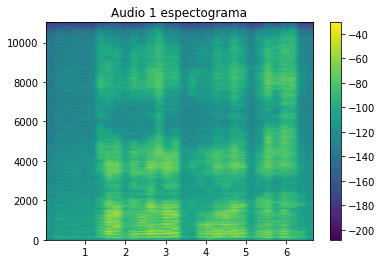

In [39]:
# A. Cálculo y gráfica del espectrograma # 1.
# Seleccionar la librería para calcular y graficar.  Ejemplo: Matplotlib o Librosa.
# Seleccionar la escala de amplitud. Ejemplo: linear, logarítmica.
# Tip: Revisar el video de mi canal de YouTube https://www.youtube.com/watch?v=hc3qMZ2NuZs
"""AUDIO 1"""
''' Espectograma con librosa '''

""" Lectura de audios """
os.system("cls")
y1, sr1 = librosa.load("m1_1.wav")


""" Varibales """
samples1 = len(y1)


""" Vectores para las graficas """
t1 = np.arange(0,samples1/sr1,1/sr1)


plt.title("Audio 1 espectograma")
plt.specgram(y1[0:1000000],NFFT=5000, Fs=sr1, noverlap=400)
plt.colorbar()
plt.show()




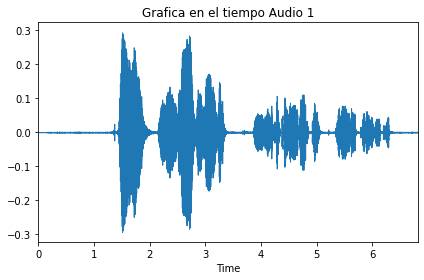

In [40]:
#Grafica en el tiempo
librosa.display.waveplot(y1,sr=sr1);
plt.title("Grafica en el tiempo Audio 1")
plt.tight_layout()
plt.savefig("audio1-grafico.jpg")


In [29]:
sr1 

22050

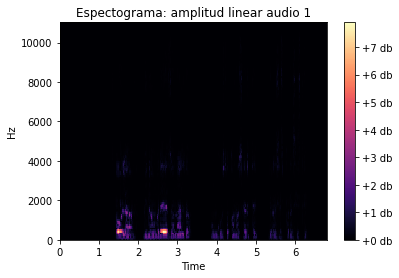

In [41]:
#Grafica espectograma Audio1
n_fft=256
hop_length=int(n_fft/4)
#TRansformada de fourier
D = np.abs(librosa.stft(y1, n_fft=n_fft, hop_length=hop_length, win_length=None, window='bohman'))

librosa.display.specshow(D,y_axis="linear", x_axis="time", sr=sr1, hop_length=hop_length)
plt.title("Espectograma: amplitud linear audio 1")
plt.colorbar(format="%+2.0f db")




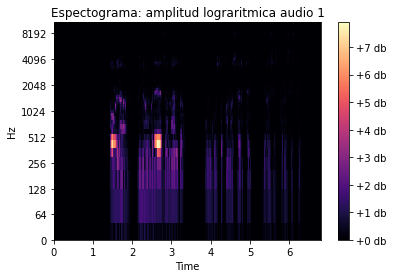

In [42]:
librosa.display.specshow(D,y_axis="log", x_axis="time", sr=sr1, hop_length=hop_length)
plt.title("Espectograma: amplitud lograritmica audio 1")
plt.colorbar(format="%+2.0f db")

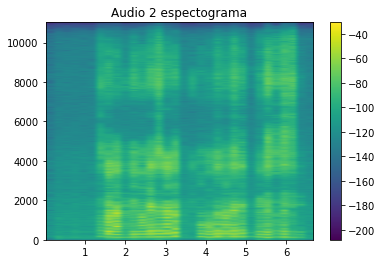

In [43]:
# B. Cálculo y gráfica del espectrograma # 2.
# Utilizar la misma librería y escala de la celda anterior.
# Tip: Revisar el video de mi canal de YouTube https://www.youtube.com/watch?v=hc3qMZ2NuZs
"""AUDIO 2""""
''' Espectograma con librosa '''

""" Lectura de audios """
os.system("cls")
y2, sr2 = librosa.load("m1_2.wav")


""" Varibales """
samples2 = len(y2)


""" Vectores para las graficas """
t2 = np.arange(0,samples1/sr2,1/sr2)

plt.title("Audio 2 espectograma")
plt.specgram(y2[0:1000000],NFFT=5000, Fs=sr2, noverlap=400)
plt.colorbar()
plt.show()

In [44]:
sr2

22050

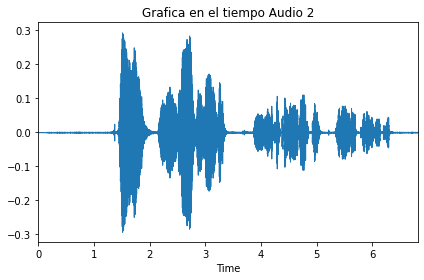

In [45]:
librosa.display.waveplot(y2,sr=sr2);
plt.title("Grafica en el tiempo Audio 2")
plt.tight_layout()
plt.savefig("audio2-grafico.jpg")


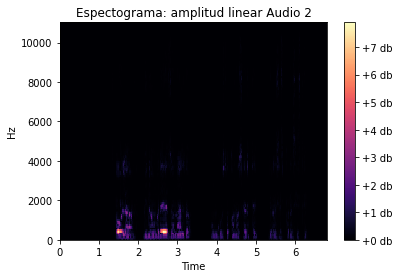

In [46]:
#Grafica espectograma Audio2
n_fft=256
hop_length=int(n_fft/4)

D = np.abs(librosa.stft(y2, n_fft=n_fft, hop_length=hop_length, win_length=None, window='bohman'))

librosa.display.specshow(D,y_axis="linear", x_axis="time", sr=sr1, hop_length=hop_length)
plt.title("Espectograma: amplitud linear Audio 2")
plt.colorbar(format="%+2.0f db")

In [ ]:

librosa.display.specshow(D,y_axis="log", x_axis="time", sr=sr1, hop_length=hop_length)
plt.title("Espectograma: amplitud logaritmica Audio 2")
plt.colorbar(format="%+2.0f db")

**3. CÁLCULO DE SIMILITUD ENTRE PAREJAS DE ESPECTROGRAMAS (0.75 unidades)**
---

In [ ]:
# A. Cálculo de similitud entre la pareja de espectrogramas obtenida en la Sección anterior.
class verificador():
  Audio1 = ""
  Audio2 = ""
  img1 = "audio1-grafico.jpg"
  img2 = "audio2-grafico.jpg"
  similitud = 0


  def  __init__ ( self , Audio1, Audio2):
      self.Audio1 = Audio1;
      self.Audio2 = Audio2;
      self.buscar()
      self.espectograma1()
      self.espectograma2()
      self.similitud()

  def buscar(self):
    self.Audio1 = f"{self.Audio1}.wav"
    self.Audio2 = f"{self.Audio2}.wav"

  def espectograma1(self):
    y1, sr1 = librosa.load(self.Audio1)
    samples1 = len(y1)
    librosa.display.waveplot(y1,sr=sr1);
    plt.title("Grafica en el tiempo Audio 1")
    plt.tight_layout()
    plt.savefig("audio1-grafico.jpg")
  def espectograma2(self):
    y2, sr2 = librosa.load(self.Audio2)
    samples2 = len(y2)
    librosa.display.waveplot(y2,sr=sr2);
    plt.title("Grafica en el tiempo Audios comparados")
    plt.tight_layout()
    plt.savefig("audio2-grafico.jpg")
  def similitud(self):
    img1 = Image.open(self.img1)
    img2 = Image.open(self.img2)
    diff = ImageChops.difference(img1,img2)
    box = diff.getbbox()
    x1, y1, z1, g1 = box
    self.similitud = ((x1)**2+(y1)**2+(z1)**2+(g1)**2)**1/2
    if self.similitud< 125000:
      print("coinciden")
    else:
      print("NO COINCIDEN")

In [7]:
# A. Cálculo de similitud entre la pareja de espectrogramas obtenida en la Sección anterior.
class verificador():
  Audio1 = ""
  Audio2 = ""
  img1 = "audio1-grafico.jpg"
  img2 = "audio2-grafico.jpg"
  similitud = 0


  def  __init__ ( self , Audio1, Audio2):
      self.Audio1 = Audio1;
      self.Audio2 = Audio2;
      self.buscar()
      self.espectograma1()
      self.espectograma2()
      self.similitud()

  def buscar(self):
    self.Audio1 = f"{self.Audio1}.wav"
    self.Audio2 = f"{self.Audio2}.wav"

  def espectograma1(self):
    y1, sr1 = librosa.load(self.Audio1)
    samples1 = len(y1)
    librosa.display.waveplot(y1,sr=sr1);
    plt.title("Grafica en el tiempo Audio 1")
    plt.tight_layout()
    plt.savefig("audio1-grafico.jpg")
  def espectograma2(self):
    y2, sr2 = librosa.load(self.Audio2)
    samples2 = len(y2)
    librosa.display.waveplot(y2,sr=sr2);
    plt.title("Grafica en el tiempo Audios comparados")
    plt.tight_layout()
    plt.savefig("audio2-grafico.jpg")
  def similitud(self):
    img1 = Image.open(self.img1)
    img2 = Image.open(self.img2)
    diff = ImageChops.difference(img1,img2)
    box = diff.getbbox()
    x1, y1, z1, g1 = box
    self.similitud = ((x1)**2+(y1)**2+(z1)**2+(g1)**2)**1/2
    if self.similitud< 125000:
      print("---->COINCIDEN<----")
    else:
      print("---->NO COINCIDEN<----")

In [ ]:
# B. Opcional: se puede utilizar más de una métrica de similitud 

#Clase que nos ayudara a calcular la metrica 
audio = "m7_2"
fila = "1"
for i in range(0 ,10,1):
  print("------------------comparacion grupal---------------------")
  print(f"muestra numero: {i+1}")
  print(f"se verificara {audio} con m{i+1}_{fila} por lo tanto: ")
  confimacion = verificador(f"{audio}",f"m{i+1}_{fila}")
  print(f"la metrica es: {confimacion.similitud} GuioAndrews [G/A]")
  print("---------------------------------------------------------")



**4. SALIDA DEL SISTEMA (3.0 unidades)**
---

------------------Comparador individual------------------
se compara m1_1 con m1_2
---->COINCIDEN<----
la metrica es: 122656.0 GuioAndrews [G/A]
---------------------------------------------------------


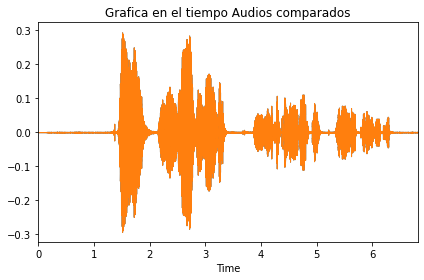

In [31]:
# A. Decisión de si los dos espectrogramas corresponden al mismo mensaje o a mensajes diferentes.
# La salida debe ser un print de "coincide"/"no coincide".
audio1 = "m1_1"
audio2 = "m1_2"

print("------------------Comparador individual------------------")
print(f"se compara {audio1} con {audio2}")
confirmacion = verificador(audio1,audio2)
print(f"la metrica es: {confirmacion.similitud} GuioAndrews [G/A]")
print("---------------------------------------------------------")

**RÚBRICA DE LA SECCIÓN 4:**

---
En esta sección el docente seleccionará al azar la comparación de 10 parejas de audios. Dependiendo de si el resultado de "coincidencia" es correcto o no, se asignará la nota, así:


1.   **10 coincidencias correctas:** se asignan las 3.0 unidades de esta sección.
2.   **7, 8, ó 9 coincidencias correctas:** se asignan 2.0 unidades de esta sección.
3.   **4, 5, ó 6 coincidencias correctas:** se asigna 1.0 unidad de esta sección.
4.   **3 o menos coincidencias correctas:**  se asignan 0.0 unidades de esta sección.

**5. ENTREGABLES**
---

Se deben subir a Google Classroom los siguientes entregables:


1.   **Código en Python:** archivo ipynb para Colaboratory.
2.   **Audios:** 20 audios.
---
Nota: si se entrega el proyecto después de la hora de cierre, se calificará con 0.
